# Bigmart Sales Prediction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
Train=pd.read_csv('dataset/bigdatamart_Train.csv')
Test=pd.read_csv('dataset/bigdatamart_Test.csv')

### Checking the first 5 rows of train and test dataset

In [3]:
Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Shape of the dataset :

In [5]:
print('Train_data',Train.shape)
print('Test_data',Test.shape)

Train_data (8523, 12)
Test_data (5681, 11)


It shows that our train dataset have 8523 rows and 12 columns where Item_Outlet_Sales is the Target column

While in Test dataset we have 5681 rows and 11 columns

## Checking Datatypes :

In [7]:
# Training Data's datatype check
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Here we can see that we have 4 float columns,7 object columns and 1 integer column in the Training dataset

In [8]:
# Testing Data's datatype check
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Here we can see that we have 3 float columns,7 object columns and 1 integer column in the Training dataset

## Checking Null values:

In [9]:
# Training Data's null value check
Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Testing Data's null value check
Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In both training and testing data, only column item weight and outlet size has null values.

## Overview of Null Values in Dataset

In [11]:
# Total percentage of the missing values in Training Data
missing_data = Train.isnull().sum()
total_percentage = (missing_data.sum()/Train.shape[0]) * 100
print(f'The total percentage of missing values in Training Dataset is {round(total_percentage,2)}%')

The total percentage of missing values in Training Dataset is 45.44%


## Statistical summary

In [12]:
Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Here we can see the min , max value in the Training dataset and also we can see the mean , median of the different features and also the standard deviation in the dataset.

## Concating the training and testing data

In [13]:
Train['source']='train'
Test['source']='test'
df=pd.concat([Train,Test],ignore_index=True)

In [14]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


Here one source column is added which tells about the which row is our train dataset and which is from test dataset as we combine both the dataset into a single dataframe

## Checking null values:

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

here we can see that the null values of Item_weight and Outlet_size are added and also as Item_Outlet_Sales is not in the test dataset that's why it shows null value in this column.

## Shape:

In [16]:
df.shape

(14204, 13)

Now we have 14204 rows and 13 columns in the dataset.

## Visualizing the data

Vislualizing the numerical columns with the help of describe method

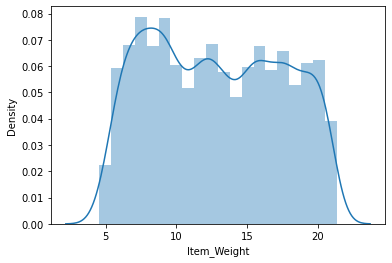

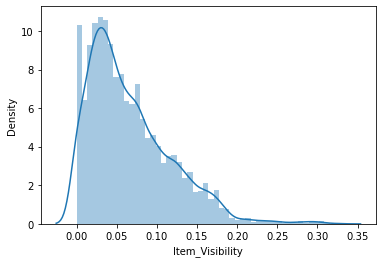

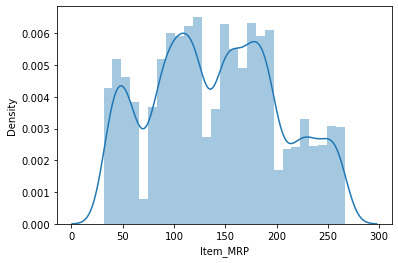

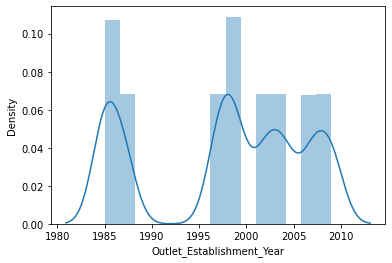

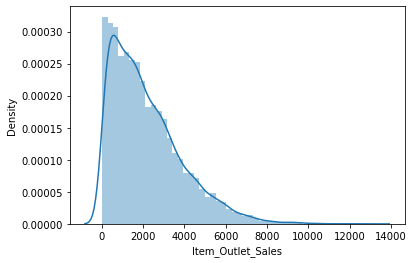

In [18]:
for i in Train.describe().columns:
    sns.distplot(Train[i].dropna())
    plt.show()

Here we can see in columns:

-Data is skewed towards right means positively skewed.(Itemvisibilty and Item_outlet)

-Show peakness.

-Deviate from normal distribution.

## Boxplots:

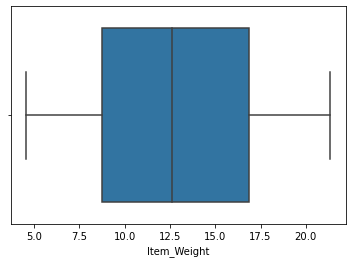

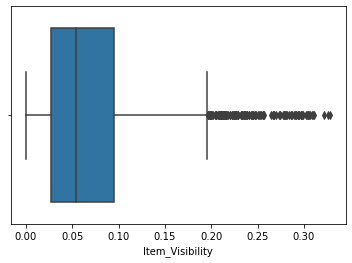

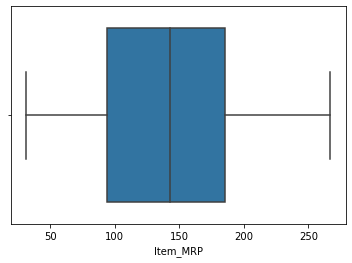

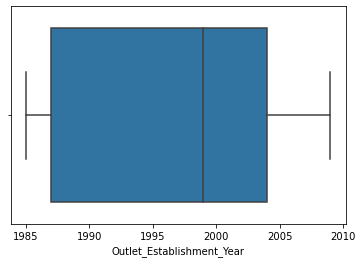

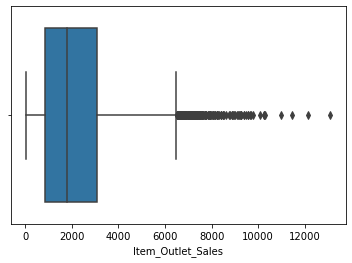

In [20]:
for i in Train.describe().columns:
    sns.boxplot(Train[i].dropna())
    plt.show()

Here we can see that in Item_visibility some outliers are present.

## Countplot

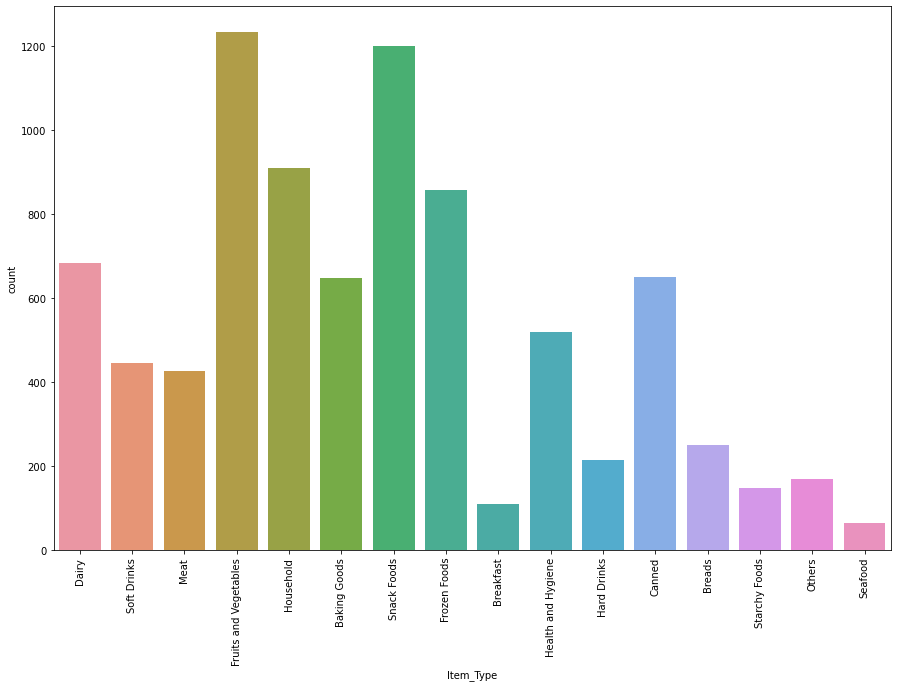

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(Train.Item_Type)
plt.xticks(rotation=90)    
plt.show()

Here we can see that the count of each item_Type and we can see that fruits and Vegetable and snack foods are very much in the train dataset.

In [22]:
Train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

As shown in the graph above , here we can see that the count of fruit and Vegetables is highest 1232 and the Snack foods also is very high i.e 1200 which mean they are sold very much.

## Disribution of Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

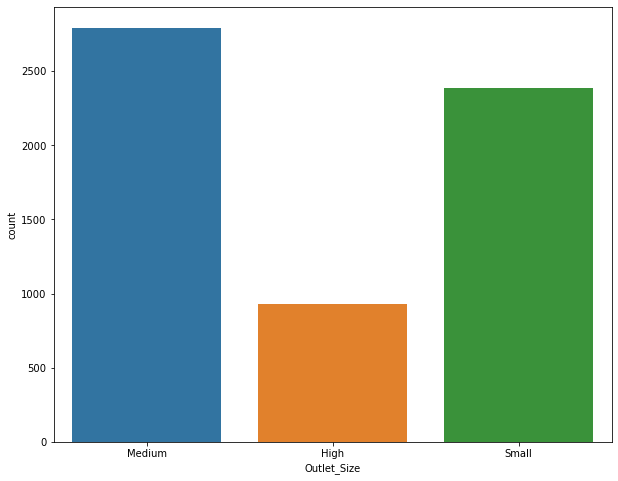

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(Train.Outlet_Size)

here we can see that the the medium size of the store in terms of ground area covered are very high

In [24]:
Train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

We can see that Medium size of the store are very high

## Distribution of Outlet_Location_Type

In [25]:
Train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

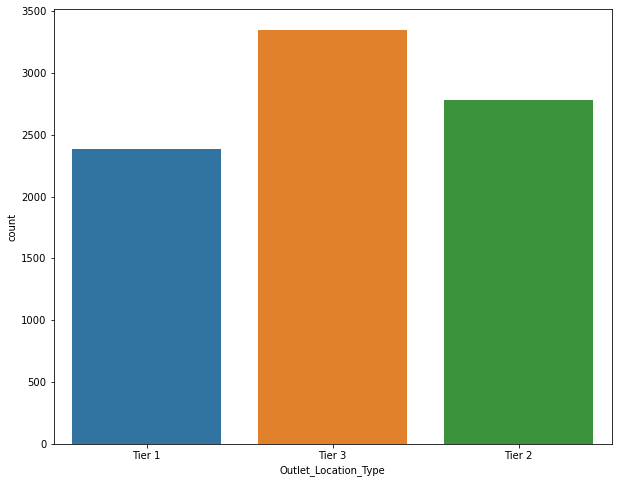

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(Train.Outlet_Location_Type)

Here we can see that The type of city in which the store is located are more in Tier 3 city

## Distribution of Outlet_Type

In [27]:
Train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

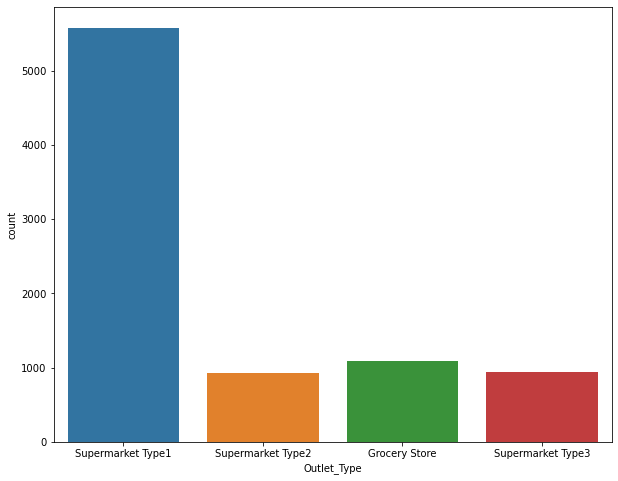

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(Train.Outlet_Type)

Here we can see that Supermarket Type 1 are very high in the city.

## Item_Outlet_Sales vs Item_Weight

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

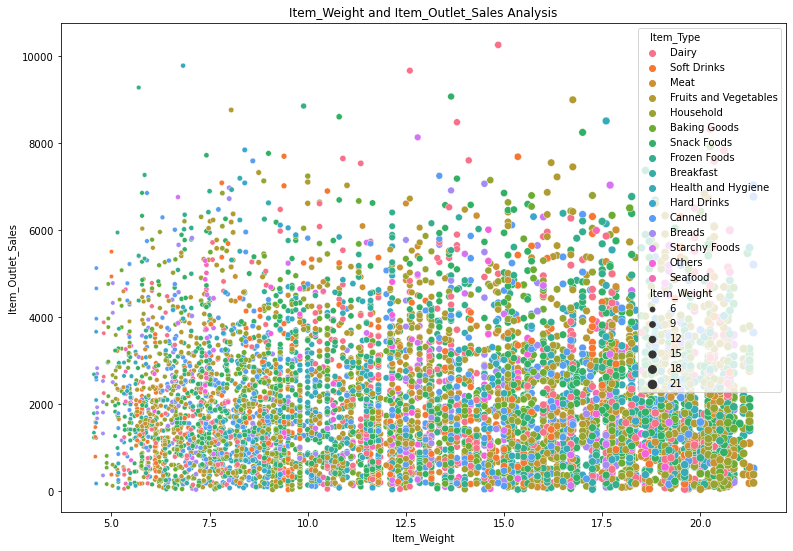

In [29]:
#Item_Outlet_Sales vs Item_Weight
plt.figure(figsize=(13,9))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
sns.scatterplot(Train['Item_Weight'], Train["Item_Outlet_Sales"],hue=df['Item_Type'],size=df['Item_Weight'])

Here we can see the relation of Weight of product and the Sales of the product in the particular store and we can see that the weight of the product have not that much impact on the sales of the product

## Item_Outlet_Sales vs Item_Visibility

<AxesSubplot:title={'center':'Item_Visibility and Item_Outlet_Sales Analysis'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

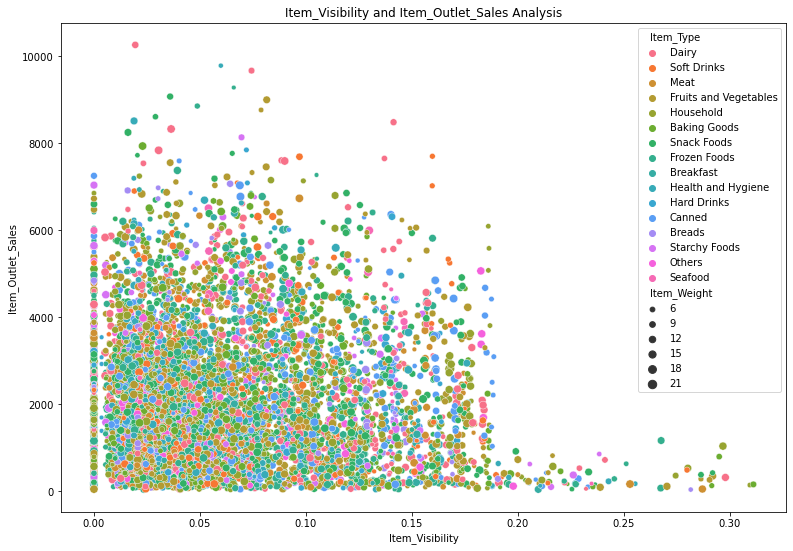

In [30]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
sns.scatterplot(Train['Item_Visibility'], Train["Item_Outlet_Sales"],hue=df['Item_Type'],size=df['Item_Weight'])

Here we can see the relationship between the % of total display area of all products in a store allocated and the Sales of the product in the particular store andwe can see that visibility of most of the items are in between 0.00 to 0.15 which is very less

## Item_Outlet_Sales and Item_MRP

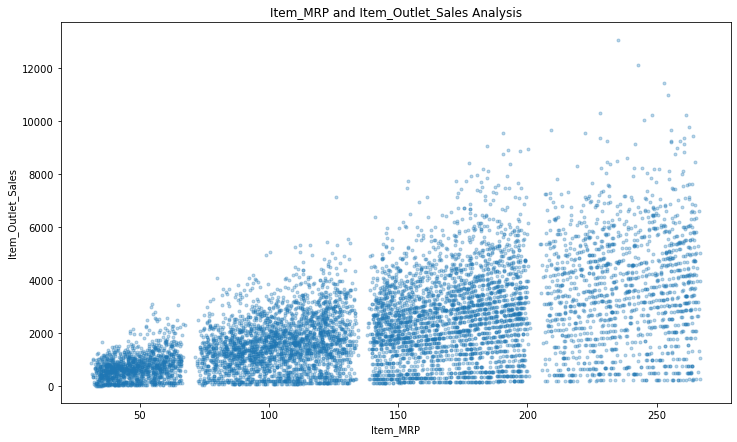

In [31]:
#Item_Outlet_Sales vs Item_MRP
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(Train['Item_MRP'], Train["Item_Outlet_Sales"],'.', alpha = 0.3)

here we can see the relationship between Item retail price and Sales of the product in the particular store and we can see that the low price items have high density while the high price have less density

## Item_Outlet_Sales vs Outlet_Establishment_Year

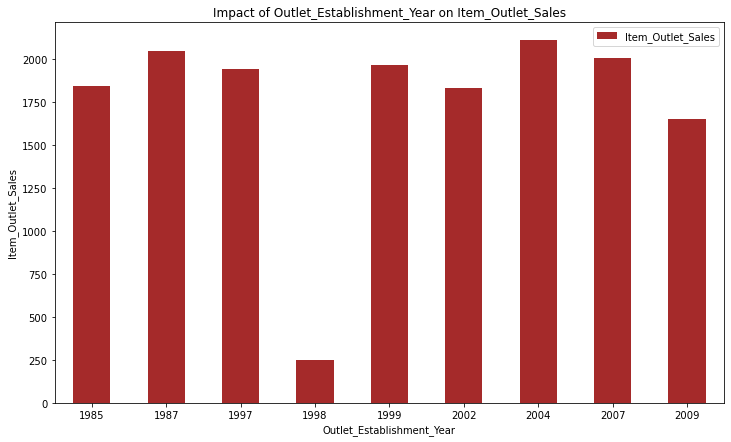

In [32]:
#Item_Outlet_Sales vs Outlet_Establishment_Year
Outlet_Establishment_Year_pivot = \
Train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='brown',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Here we can see the Impact of the year in which store was established on the Sales of the product and we can see that some year have very high sale of the product

## Item_Outlet_Sales vs Outlet_Type

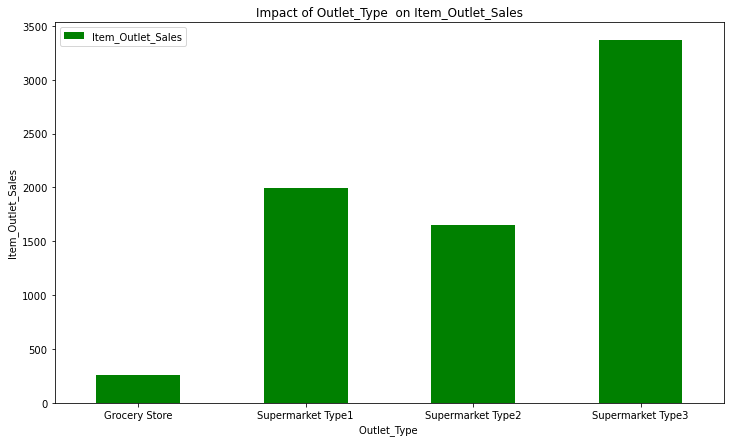

In [33]:
#Item_Outlet_Sales vs Outlet_Type 
Outlet_Type_pivot = \
Train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type  on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Here we can see that the Impact of Outlet_Type on Item_Outlet_Sales is very high for supermarket Type 3 market of the city

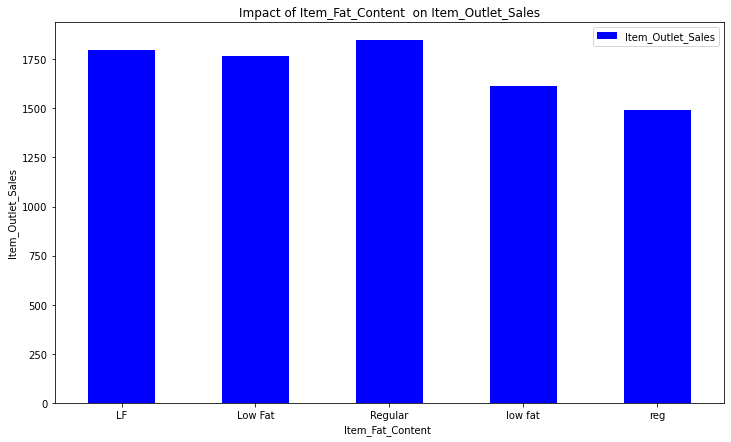

In [34]:
Item_Fat_Content_pivot = \
Train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content  on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Here we can see the impact of the product is low fat or not on the Sales of the product in the particular store is high for the Low fat Type Fat content Item.

In [35]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [36]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

replacing low fat and LF with Low Fat replacing reg with Regular

In [37]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Now we can see that the Item_Fat_Content have 9185 Low fat content and 5019 Regular Item_fat_content

For visualizing we do it same for the Training data

In [38]:
Train['Item_Fat_Content']=Train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

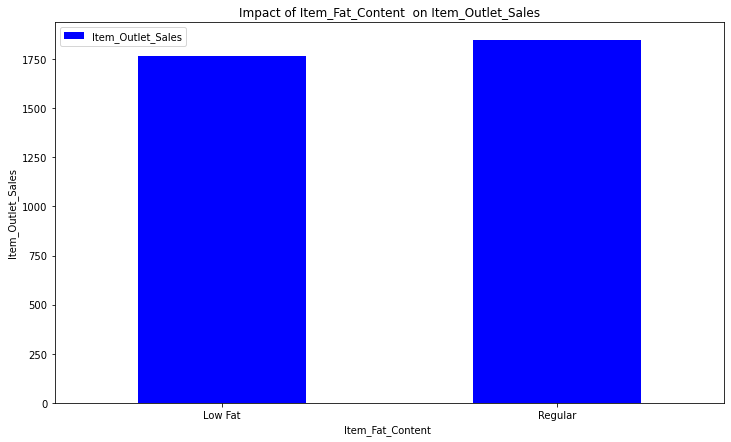

In [39]:
Item_Fat_Content_pivot = \
Train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content  on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Now we can see that the Impact of Item_Fat_Content on Item_Outlet_Sales

## Check correlation

In [40]:
Train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


All the variables have very less correlation between each other Only exception is Item_MRP and Item_Outlet_Sales which shows significant correlation of 0.56

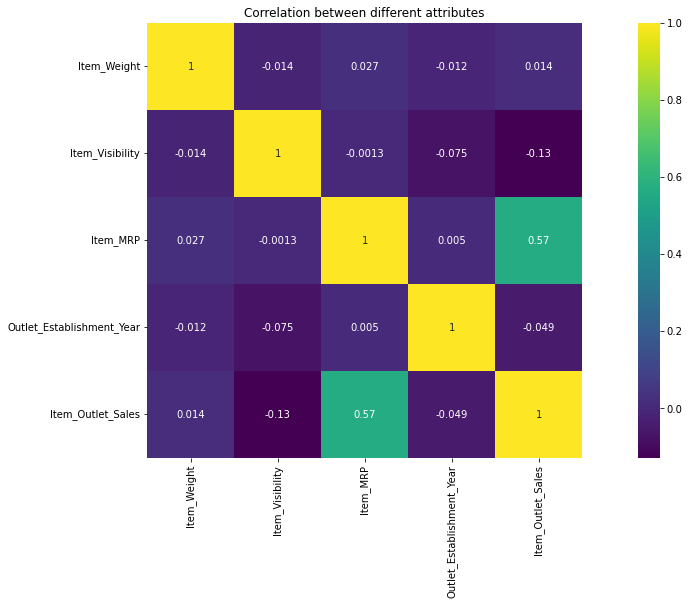

In [41]:
plt.figure(figsize=(20,8))
sns.heatmap(Train.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

here we can see that correlation among the features and the Item_MRP and Item_Outlet_Sales have high correlation of 0.57



## Inference


Item_Weight - No specific pattern, as the data is very much spreaded,

Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicates small visibility items are not selling well is some cases.

Item_MRP - Items with average higher MRP tend to sell better in most cases.

Outlet_Age - No specific inference as both old and new outlets are performing better except few.

## Feature Engineering and Transformation


## Treating the Missing Values

### Item_Weight

In [42]:
df['Item_Weight'].mean()

12.792854228644991

we will replace the NaN values with this mean

In [43]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True) 

### Outlet_Size

In [44]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

we will replace the NaN values with this medium

In [45]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [46]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Now we don't have any null values

In [47]:
Train.shape

(8523, 13)

In [48]:
Test.shape

(5681, 12)

### Item Visibility

In [49]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [50]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

Replacing 0 with median

### Outlet Years

In [51]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [52]:
df['Outlet_Years']=2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### Item type

In [53]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

### The item types are either Food ,Drinks or Non-Consumables.

In [54]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Here we can identify the items with there Id

A closer look at each of he Item_Identifier shows that hey either starts with "FD"(Food);"DR"(Drinks) or "NC"(Non-Consumables,i.e into 3 categories.

For us to do a better analysis, we will be creating 3 categories as pointef out instead of the already existing 16 categories

In [55]:
#Changing only the first 2 characters (i.e the category ID)
df['New_Item_type']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [56]:
#Rename them to more intuitive categories:
df['New_Item_type']=df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drink'})

df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_type, dtype: int64

Mark non-consumables as separate category in low fat: because a non-consumable product can't be associate with the fat-content

In [57]:
df.loc[df['New_Item_type']=="Non-Consumable",'Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Under normal circumstance, if a product is more visible , then it will be getting higher sales.

In [59]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,15,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26,Non-Consumable


In [60]:
#Also one observation about the item visibility is that it can't be 0 so that also needs to be replaced
#We can replace it by mean of item visibilty gropped by item identifier
item_visibility_means=df.groupby(["Item_Identifier"]).agg({"Item_Visibility":"mean"})
item_visibility_means
for index in item_visibility_means.index:
    zero_visibility_rows=df.loc[(df["Item_Identifier"]==index)&(df["Item_Visibility"]==0)]
    if len(zero_visibility_rows.index)>0:
        for index_2 in zero_visibility_rows.index:
            df.loc[index_2,["Item_Visibility"]]=item_visibility_means.loc[index][0]

In [61]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14,Food
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,15,Food
4,NCD19,8.93,Non-Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26,Non-Consumable


## Dealing with our Categorical Variables

### Label Encoder

Converting all categorical variables into numeric types(Values of 0 or 1) using the labelEncoder function

In [62]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

#New variable for outlet
df['Outlet']=df['Outlet_Identifier']
varib=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_type','Outlet']
for i in varib:
    df[i]=label.fit_transform(df[i])

In [63]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,14,1,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,4,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,14,1,9
3,FDX07,19.20,2,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,15,1,0
4,NCD19,8.93,1,0.009780,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,26,2,1


Now we create dummy variables for these Label encoded variables

In [64]:
#Dummy Varibles:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_type','Outlet'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_0                       uint8
O

In [65]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0


In [66]:
#lets chcek the skewness
cols_to_be_checked=["Item_MRP","Item_Visibility","Item_Weight","Outlet_Years"]
for col in df.skew().index:
    if col in cols_to_be_checked:
        print("Skewness of column {} is: {}".format(col,df.skew().loc[col]))

Skewness of column Item_Weight is: 0.11131389957012323
Skewness of column Item_Visibility is: 1.2574052519888317
Skewness of column Item_MRP is: 0.13072836040225866
Skewness of column Outlet_Years is: 0.3964651900863859


In [67]:
#Lets treat the skewness
import numpy as np
df.skew()
for col in df.skew().index:
    if col in cols_to_be_checked:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [68]:
#Lets again chcek the skewness
for col in df.skew().index:
    if col in cols_to_be_checked:
        print("Skewness of column {} is: {}".format(col,df.skew().loc[col]))

Skewness of column Item_Weight is: 0.11131389957012323
Skewness of column Item_Visibility is: 0.41413332304805806
Skewness of column Item_MRP is: 0.13072836040225866
Skewness of column Outlet_Years is: 0.3964651900863859


In [69]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.126678,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.138846,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.129461,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.133545,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.098893,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.116174,Snack Foods,141.3154,OUT046,1997,NaN,test,16,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.378141,Starchy Foods,169.1448,OUT018,2009,NaN,test,4,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.271162,Health and Hygiene,118.7440,OUT045,2002,NaN,test,11,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.297288,Canned,214.6218,OUT017,2007,NaN,test,6,...,0,0,1,0,0,0,0,0,0,0


In [70]:
#lets drop ["Item_Identifier","Outlet_Identifier","source"]
df.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)

In [71]:
df.drop(columns=["Item_Type","Outlet_Establishment_Year"],inplace=True)

In [72]:
#Lets seprate the train and test
df_train=df.loc[df["source"]=="train"]
df_test=df.loc[df["source"]=="test"]
df_test.reset_index(drop=True,inplace=True)
print(df_train.columns)
print(df_test.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'source', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'New_Item_type_0', 'New_Item_type_1',
       'New_Item_type_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'source', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet

In [73]:
#Lets drop the Item_Outlet_Sales from test dataset as that is the o/p variable that needs to be predicted
df_test.drop(columns=["Item_Outlet_Sales"],inplace=True)

In [74]:
#lets drop source column from df_train and df_test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [75]:
#seprating input and output from df_train
X=df_train.drop(columns=["Item_Outlet_Sales"])
y=df_train[["Item_Outlet_Sales"]]

## Model Building

### Splitting the data into train test

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5966, 30)
(2557, 30)
(5966, 1)
(2557, 1)


In [78]:
display(X_train.head(),y_train.head(),'Testing Data',X_test.head(),y_test.head())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
3058,12.792854,0.258785,39.2796,28,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2485,16.850000,0.191301,90.6488,6,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4100,11.300000,0.085287,196.6426,26,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6487,19.700000,0.254773,88.5198,9,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6585,17.350000,0.204932,102.9016,16,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


,Item_Outlet_Sales
3058,701.7532
2485,633.8416
4100,5141.3076
6487,1308.2970
6585,1922.8304


'Testing Data'

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
1576,13.650,0.112923,55.5588,16,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3091,16.750,0.180701,190.8162,11,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3830,5.175,0.193308,86.9224,26,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5959,21.250,0.139309,119.3756,26,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2028,16.700,0.319462,184.0292,16,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


,Item_Outlet_Sales
1576,1603.2464
3091,2886.2430
3830,255.6672
5959,3271.7412
2028,3101.2964


In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
df_test=sc.transform(df_test)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import joblib

## Model Training

In [81]:
LR=LinearRegression()
sv=SVR()
rf=RandomForestRegressor(n_estimators=100)
knn=KNeighborsRegressor()
dtr=DecisionTreeRegressor()
ls=Lasso(alpha=0.01)
rd=Ridge(alpha=0.01)

In [82]:
model=[LR,sv,rf,knn,dtr,ls,rd]

for m in model:
    m.fit(X_train,y_train)
    predm=m.predict(X_test)
    print("The Mean absolute error value of ",m ,"is. ")
    print("Mean absolute error: " , mean_absolute_error(y_test,predm))
    print()
    print("The Mean squared error value of ",m ,"is. ")
    print("Residual sum of squares (MSE): " , mean_squared_error(y_test,predm))
    print()
    print("The r2_score value of ",m ,"is. ")
    print("R2-score of : " , r2_score(y_test,predm))
    print()
    print("Now check with Cross validation\n")
    
    score=cross_val_score(m,X,y,cv=5)
    print("The score after cross_validation : ",score)
    print("The Mean score after cross_validation : ",score.mean())
    print('\n')

The Mean absolute error value of  LinearRegression() is. 
Mean absolute error:  827.0197862155685

The Mean squared error value of  LinearRegression() is. 
Residual sum of squares (MSE):  1267555.48438801

The r2_score value of  LinearRegression() is. 
R2-score of :  0.569067308226557

Now check with Cross validation

The score after cross_validation :  [0.57117424 0.55533788 0.54748829 0.56661541 0.56502945]
The Mean score after cross_validation :  0.5611290575647658


The Mean absolute error value of  SVR() is. 
Mean absolute error:  1243.1633720729612

The Mean squared error value of  SVR() is. 
Residual sum of squares (MSE):  2884795.5477173342

The r2_score value of  SVR() is. 
R2-score of :  0.019251838751593198

Now check with Cross validation

The score after cross_validation :  [0.17505116 0.1978855  0.18307866 0.18308133 0.17941402]
The Mean score after cross_validation :  0.18370213533176669


The Mean absolute error value of  RandomForestRegressor() is. 
Mean absolute error

Minimum difference in R2score and Cross validation score is for Lasso. So this is our best model.

AS R2 score is : 0.57 and Cross validation score is : 0.56

## Hyper parameter tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [{'alpha':np.arange(0, 1, 0.01),
              'selection':['cyclic', 'random'],
              'fit_intercept':[True,False],
              'normalize':[True,False] 
             }]

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,n_jobs=-1)

rand_search.fit(X_train, y_train)

print(rand_search.best_estimator_)
print(rand_search.best_score_)

Lasso(alpha=0.12, normalize=True, selection='random')
0.5584134721823422


## Final modelling and evaluating using Best Parameteres.

In [84]:
m=Lasso(alpha=0.64)
m.fit(X_train,y_train)
predm=m.predict(X_test)
print("The Mean absolute error value of ",m ,"is. ")
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,predm))
print()
print("The Mean squared error value of ",m ,"is. ")
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test,predm))
print()
print("The r2_score value of ",m ,"is. ")
print("R2-score of : %.2f" % r2_score(y_test,predm))
print()
print("Now check with Cross validation\n")
    
score=cross_val_score(m,X,y,cv=10)
print("The score after cross_validation : ",score)
print("The Mean score after cross_validation : ",score.mean())

The Mean absolute error value of  Lasso(alpha=0.64) is. 
Mean absolute error: 826.86

The Mean squared error value of  Lasso(alpha=0.64) is. 
Residual sum of squares (MSE): 1265678.59

The r2_score value of  Lasso(alpha=0.64) is. 
R2-score of : 0.57

Now check with Cross validation

The score after cross_validation :  [0.56095493 0.5826888  0.54263334 0.56767179 0.51070032 0.57708349
 0.57910606 0.55590841 0.5802825  0.54821572]
The Mean score after cross_validation :  0.5605245354419732


##### The final model has Cross-validation score of 0.56

## Saving the model

In [86]:
#saving the model
model=joblib.dump(m,'BigM.obj')

### Conclusion :

In [87]:
loaded_model= joblib.load('BigM.obj')
result=loaded_model.score(X_test,y_test)
print(result)

0.5697053975058383


In [88]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],predm[:]],index=['Predicted','Original'])

In [89]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556
Predicted,1024.30855,2918.97404,1446.961401,1940.258242,2932.038893,1197.506979,2908.187087,898.467374,2042.762723,1930.900616,...,868.019183,2511.572072,2242.881225,2982.410384,2619.941942,3790.2871,185.762553,1641.686122,708.993105,3903.266865
Original,1024.30855,2918.97404,1446.961401,1940.258242,2932.038893,1197.506979,2908.187087,898.467374,2042.762723,1930.900616,...,868.019183,2511.572072,2242.881225,2982.410384,2619.941942,3790.2871,185.762553,1641.686122,708.993105,3903.266865
